# Deutsch's Algorithm
#### By Killian O'Suilleabhain
## Introduction
***
David Deutsch initially introduced the algorithm known as Deutsch's Algorithm in 1985. In 1992, he collaborated with Richard Jozsa to enhance and expand upon the algorithm, resulting in the renamed Deutsch-Jozsa Algorithm [1](https://en.wikipedia.org/wiki/David_Deutsch). The original Deutsch's Algorithm is now referred to as Deutsch's Problem [2](https://sciencedirect.com/science/article/pii/S0079672798000044). *(In this project, I will be reffering to the origninal algorithm as Deutsch's Problem.)* Deutsch's Problem was the first algorithm to demonstrate the quantum advantage and in many circles, is believed to have started the world of Quantum Computing.  

To understand Deutsch's Algorithm in more detail, we must also understand what is a quantum computer, and how it differentriates between a classical computer aswell as the role it plays in the algorithms use. We will use Quikit to demonstrate the algorithm aswell as give a more robust understaning of how the algorithm works before coming to our conclusion on the algorithm.


## What is Quantum Computing
*** 
Quantum computing is a field of computing that takes advantage of the principles of quantum mechanics to perform certain types of computations much more efficiently than classical computers. Classical computers use bits as the basic unit of information, which can be in one of two states: 0 or 1. Quantum computers, on the other hand, use quantum bits or qubits, which can exist in multiple states simultaneously thanks to the principle of superposition. [3](https://www.investopedia.com/terms/q/quantum-computing.asp#:~:text=Quantum%20computing%20uses%20phenomena%20in,grows%20exponentially%20with%20more%20qubits).

#### Qubits vs Bits
At any given time a bit can only exist in one of two states which is either 0 or 1 which may also be known as true or false. These binary values are stored in memory, through the use of capacitors that hold electrical charges. The charge determines the state of each bit, which, in turn, determines the bit's value [4](https://www.techtarget.com/whatis/definition/bit-binary-digit). Bits are generally used in classical computing where they use bits to perform computations based on classical logic gates.

A qubit known as a Quantum bit is a two-level quantum system where the two basis qubit states are written as ∣0⟩ and ∣1⟩. A qubit can be in a state ∣0⟩,∣1⟩ unlike a classical bit in a linear state known as a superposition [5](https://www.quantum-inspire.com/kbase/what-is-a-qubit/). Qubits are used in quantum computing because they harness the principles of quantum mechanics to perform certain types of computations more efficiently than classical bits in classical computing. It's important to note that building and maintaining stable qubits present substantial challenges due to factors like quantum decoherence and error correction.

#### Superposition
A superposition is when a qubit exists in multiple states at the same time, Mathematically, if ∣ψ⟩ represents the state of a qubit, it can be in a superposition like this: ∣ψ⟩= α∣0⟩ + β∣1⟩. The thought experiment of Schrödinger's cat is a simple way to explain superposition where in this thought experiment the cat is in a box either with a 50% chance of being alive or dead where we won't know the answer until we open the box but in the meantime we can assume that the cat is both alive and dead simultaneously putting the cat in a superposition. 

A more real experiment to explain superposition is the double slit experiment which is an experiment that exhibits the wave-like and particle-like features of particles. In this experiment scientists shoot electrons through one of two holes with an even chance that the electrons will go through either the top or bottom slit and through this will track which gap the electrons went through the photons will then hit a back screen which maps the final position of the electrons. The result of the experiment isn't what you would expect as you would expect it to hit the screen roughly at the same two points but in this experiment, it creates a wave-like pattern that demonstrates the dual natures of particles similar to a superposition in quantum computing [6](https://en.wikipedia.org/wiki/Double-slit_experiment).

![double slit experiment expected](https://cdn.ttgtmedia.com/rms/onlineimages/expected_results_of_double_slit_experiment-f_mobile.png)
![double slit experiment reality](https://cdn.ttgtmedia.com/rms/onlineimages/actual_results_of_double_slit_experiment-f_mobile.png)

Superposition allows quantum computers to process information in parallel by exploring many possible solutions to a problem simultaneously. This capability is one of the factors that can lead to exponential speedup for certain types of computations when compared to classical computers.

## Qiskit
*** 
Qiskit is an open source SDK used in Quantum Computing founded by IBM. Qiskit is used to create/visualize circuits, pulses, and algorithms. Qiskit uses the Python programming language to run on most devices which I will be using throughout this notebook to run circuits and algorithms as needed. Qiskit also allows users to access IBM's quantum processors via the IBM Quantum Experience [17](https://en.wikipedia.org/wiki/Qiskit#:~:text=Qiskit%20is%20an%20open%2Dsource,simulators%20on%20a%20local%20computer.).

## Quantum Gates & Circuits
*** 
#### Quantum Gates 
In quantum computing, a quantum gate is a fundamental building block of quantum circuits. These gates are analogous to classical logic gates used in classical computing but operate on qubits, which can exist in multiple states simultaneously due to the principles of superposition and entanglement [7](https://en.wikipedia.org/wiki/Quantum_logic_gate). Quantum gates manipulate the state of qubits by performing unitary transformations. These transformations are reversible and enable the creation of quantum circuits. Other aspects of their uses include Quantum Information Processing, Quantum Algorithms and creating Superposition and Entanglement.

An example of a quantum gates which I will cover is the Hadamard Gate

The Hadamard gate, denoted as \(H\), is represented by the symbol:  
![Hadamard gate Symbol](https://i0.wp.com/quantumzeitgeist.com/wp-content/uploads/Quantum_Logic_Gates.png-2443%C3%973003-1.png?resize=310%2C160&ssl=1)  
is represented by the Matrix:  
![Hadamard gate Symbol](https://i0.wp.com/quantumzeitgeist.com/wp-content/uploads/Quantum_Logic_Gates.png-2443%C3%973003.png?resize=265%2C146&ssl=1)

#### Quantum Circuits
Quantum Circuits are a mathematical representation of operations formed in quantum algorithms which is a collection of quantum gates connected by quantum wires. These circuits solve coherent quantum operations on quantum data, such as qubits [8](https://docs.quantum.ibm.com/api/qiskit/circuit).

The below code using qiskit creates a quantum circuit with two qubits which applies the Hadamard gates to both qubits, and then applies a CNOT gate to create an entangled state. The state vector is then simulated to show the final state of the system, which should be an entangled Bell state.

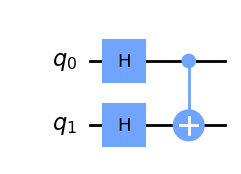

In [23]:
from qiskit import QuantumCircuit, transpile, assemble, BasicAer

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Apply Hadamard gate to the first qubit
qc.h(0)

# Apply Hadamard gate to the second qubit
qc.h(1)

# Apply CNOT gate to create entanglement
qc.cx(0, 1)

# Visualize the circuit
#print(qc)

# Simulate the circuit using the unitary simulator
simulator = BasicAer.get_backend('unitary_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(assemble(compiled_circuit)).result()

# Get the final unitary matrix
unitary_matrix = result.get_unitary()

#print("Final Unitary Matrix:")
#print(unitary_matrix)

# Draw the circuit
qc.draw('mpl')



#### Entanglement
Entanglement is a phenomenon in quantum science where two or more quantum particles or in this topic two or more qubits become connected in a way in which both their states are linked to one another. The link between both parties is so strong that they could be miles apart but will always be able to communicate with one another [9](https://shorturl.at/rNOR7). 

One example of an entangled state is the Bell State which is shown in the circuit above where two qubits are in a superposition of being both in the state |0⟩ or both in the state |1⟩. When the state of one qubit is measured, the state of the other qubit is instantly known, regardless of the distance between the two 

Entanglement is crucial in quantum information processing and quantum computing. Quantum algorithms and protocols often leverage entanglement to perform tasks that classical computing finds challenging or impossible.

## Applications & Challenges of Quantum Computing
*** 
Quantum computers have the possibility to change the world forever by being able to run and solve certain types of computations much more efficiently than classical computers. These advantages include machine learning drug discovery and cryptography. However with these advantages come disadvantages which are challenges that must be overcome from scalability, decoherence and also cybersecutiy/cryptography [10](https://www.sdxcentral.com/security/quantum/definitions/what-are-the-disadvantages-of-quantum-computing/).

#### Advantages
Taking the 3 examples I gave for advantages earlier I will go more indepth into each one.
* __Machiene Learning__  
While classical computers are constrained by limited storage and processing capacities, quantum computers allow for exponentially more storage and processing power. This ability to store and process huge amounts of information means that quantum computers can analyze massive data sets that would take classical methods much longer to perform [11](https://www.coursera.org/articles/quantum-machine-learning?utm_medium=sem&utm_source=gg&utm_campaign=B2C_EMEA__coursera_FTCOF_career-academy_pmax-multiple-audiences-country-multi&campaignid=20858198824&adgroupid=&device=c&keyword=&matchtype=&network=x&devicemodel=&adposition=&creativeid=&hide_mobile_promo&gclid=Cj0KCQiAm4WsBhCiARIsAEJIEzU8IvA1upf47GPra12leTDIOWuchi5QNXs1IBnWcpZsmmyQXMz66N8aAmC8EALw_wcB).  
* __Drug Discovery__  
Quantum Computers are capable of simulating how molecules interact with one another more authentically and get a better understanding of how the outcomes of this will impact people. They can currently do this on classical computers but will be able to gain a bigger and more complex understanding from quantum computers as it has much better processing capabilities [12](https://www.imperial.ac.uk/news/248638/towards-using-quantum-computing-speed-drug/#:~:text=transformations%20and%20advancements.-,Quantum%20computing%20can%20simulate%20interactions%20between%20molecules%20more%20authentically%2C%20enabling,during%20the%20drug%20design%20stage.).
* __Cryptography__  
Through the use of QKD (Quantum Key Distribution), quantum computing can enhance the security of communication through QKD, allowing the creation of unbreakable encryption keys. It allows two parties to create a shared encryption key which uses unique properties of quantum mechanical systems to generate and distribute cryptographic keying material [13](https://www.techtarget.com/searchsecurity/definition/quantum-key-distribution-QKD).

#### Disadvantages
Taking the 3 examples I gave for disadvantages earlier I will go more indepth into each one.
* __Scalability__   
Scalability is said to be the biggest issue facing quantum computers today as while they are more capable of performing algorithms than classical computers they are still relatively small in comparison. As well as size scaling up to thousands of qubits while trying to maintain high levels of coherence and low error rates remains an issue [14](https://thequantuminsider.com/2023/03/24/quantum-computing-challenges/).
* __Decoherence__  
Decoherence is an issue facing quantum computing as these computers are acceptable to environmental noises and interferences which leads to a loss of coherence and decay and eliminates quantum behaviour of particles [15](https://en.wikipedia.org/wiki/Quantum_decoherence). 

* __Cybersecutiy/Cryptography__  
The concern about cybersecurity and cryptography is that soon these quantum computers will be able to break the algorithms that currently keep all our own passwords encrypted which would require new cryptography methods to be created similar to the one I have mentioned in the advantages. But until then many passwords could be obsolete which would become a race against the clock to solve [16](https://www.securityweek.com/how-quantum-computing-will-impact-cybersecurity/#:~:text=As%20research%20on%20quantum%20computers,protect%20against%20these%20powerful%20machines.). 


## Calculating Deutchs Algorithm / Deutsch's Problem
*** 
Deutsch's algorithm was created to solve the problem, The Deutsch problem. Deutsch's problem is a particular computational problem in quantum computing. In this problem, we are presented with a black-box function (also known as an oracle) where we can either have a single bit input of 0 or 1 and will receive a single bit output of either 0 or 1. This function can fall into one of two categories: Constant or Balanced. But what does this mean?

Given a quantum oracle f:{0,1}→{0,1}, the task is to determine whether the oracle function is constant or balanced. Classical Computers will need two Queries to the oracle to prove this while Deutchs Algorithm / Deutsch's Problem needs 1.

### Deutchs Algorithm Circuit

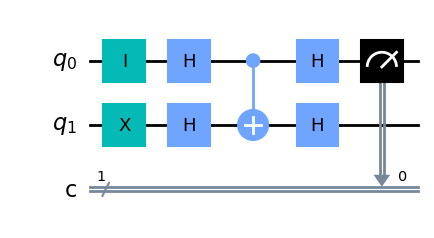

In [15]:
from qiskit import QuantumCircuit

# Initalize a 2 qubit circuit
circ = QuantumCircuit(2,1)
circ.i(0)
circ.x(1)

# Applying a hardaman gate
circ.h(0)
circ.h(1)

# CNOT gate
circ.cx(0,1)
# Adding hardaman gate to qubits
circ.h(0)
circ.h(1)
# Measurement of first qubit
circ.measure(0,0)

circ.draw('mpl')

### IBM Quantum Computer 
To use IBM Quantum computers with Qiskit, you don't need to install any specific software for the actual quantum computer. Instead, you'll need to install Qiskit and configure it to use your IBM Quantum Experience account, where you can access real quantum devices. with this you can use a personal API token for free and run the code.

I have ran into issues which I am unable to solve with the quantum computer.

## Conclusion
*** 
Deutsch's Algorithm is an example that highlights the unique capabilities of quantum computing and its potential to outperform classical computing in specific instances.

From this Project I have been greatly exposed too learning more about Quantum computing and the capabilities it holds for the real world and for the world of computing.

## References
[1] https://en.wikipedia.org/wiki/David_Deutsch  
[2] https://sciencedirect.com/science/article/pii/S0079672798000044  
[3] https://www.investopedia.com/terms/q/quantum-computing.asp#:~:text=Quantum%20computing%20uses%20phenomena%20in,grows%20exponentially%20with%20more%20qubits  
[4] https://www.techtarget.com/whatis/definition/bit-binary-digit  
[5] https://www.quantum-inspire.com/kbase/what-is-a-qubit/   
[6] https://en.wikipedia.org/wiki/Double-slit_experiment  
[7] https://en.wikipedia.org/wiki/Quantum_logic_gate  
[8] https://docs.quantum.ibm.com/api/qiskit/circuit  
[9] https://shorturl.at/rNOR7   
[10] https://www.sdxcentral.com/security/quantum/definitions/what-are-the-disadvantages-of-quantum-computing/  
[11] https://www.coursera.org/articles/quantum-machine-learning?utm_medium=sem&utm_source=gg&utm_campaign=B2C_EMEA__coursera_FTCOF_career-academy_pmax-multiple-audiences-country-multi&campaignid=20858198824&adgroupid=&device=c&keyword=&matchtype=&network=x&devicemodel=&adposition=&creativeid=&hide_mobile_promo&gclid=Cj0KCQiAm4WsBhCiARIsAEJIEzU8IvA1upf47GPra12leTDIOWuchi5QNXs1IBnWcpZsmmyQXMz66N8aAmC8EALw_wcB  
[12] https://www.imperial.ac.uk/news/248638/towards-using-quantum-computing-speed-drug/#:~:text=transformations%20and%20advancements.-,Quantum%20computing%20can%20simulate%20interactions%20between%20molecules%20more%20authentically%2C%20enabling,during%20the%20drug%20design%20stage.  
[13] https://www.techtarget.com/searchsecurity/definition/quantum-key-distribution-QKD  
[14] https://thequantuminsider.com/2023/03/24/quantum-computing-challenges/  
[15] https://en.wikipedia.org/wiki/Quantum_decoherence  
[16] https://www.securityweek.com/how-quantum-computing-will-impact-cybersecurity/#:~:text=As%20research%20on%20quantum%20computers,protect%20against%20these%20powerful%20machines.  
[17] https://en.wikipedia.org/wiki/Qiskit#:~:text=Qiskit%20is%20an%20open%2Dsource,simulators%20on%20a%20local%20computer. 
[18]  
[19]     
## Video References
https://youtu.be/m6pJNW_jpw0?si=wEZOHg4JdQ3mMlpW -Rocks to Intellegence 

https://youtu.be/JhHMJCUmq28?si=bHlrt3l-rYzkB9E9 -Quantum Computers Explained

https://youtu.be/-UrdExQW0cs?si=kwKBOAlkQbBhV3R2 -Quantum Computers Break the Internet

https://youtu.be/7MdEHsRZxvo?si=JBITUPn1KTU13SL6 -Deutsch's Algorithm

https://youtu.be/JYNRvYhgUeY?si=8QaKrj9OXtsz8lke -Superposition

https://www.youtube.com/watch?v=UjaAxUO6-Uw -Schrödinger's cat: A thought experiment in quantum mechanics - Chad Orzel Ted Talk

https://youtu.be/rqmIVeheTVU?si=ff-oiwVWk62h8h18 -Entanglement

https://www.youtube.com/watch?v=8hNQyTdNil4 -Quantum Key Distribution

https://youtu.be/ZLAZ6lJ42ak?si=VwfDywOgM5uDQKKy -Applications of Quantum Computers

https://youtu.be/lvTqbM5Dq4Q?si=F6PZc1RXCVyCOaoQ -Quantum Computers Breaking Encryption 

https://www.youtube.com/watch?v=ZBaXPY_0TNI -Logic Gates